In [4]:
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
from tensorflow import keras
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [5]:
# 파일 불러오기
train_data = pd.read_csv('train.csv',header=None)
train_data.head(2)
test_data = pd.read_csv('t10k.csv',header=None)
test_data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_input = train_data/255
test_input = test_data/255

In [7]:

train_input.shape

(1001, 785)

In [8]:
test_input.shape

(501, 785)

In [9]:
train_scaled,val_scaled,train_target,val_target = train_test_split(
    train_scaled,train_target,test_size=0.2,random_state=42
)

NameError: name 'train_scaled' is not defined

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(785,))) #train_input.shape 사이즈이다
model.add(keras.layers.Dense(100,activation='relu')) #규제해서 랜덤으로 70개만사용
model.add(keras.layers.Dropout(0.3)) # 30%를 제외시키는 규제를 적용시키는것이다(계속 확인)
model.add(keras.layers.Dense(10,activation='softmax'))

NameError: name 'keras' is not defined

In [ ]:
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 785)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        78,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,610 (310.98 KB)

 Trainable params: 79,610 (310.98 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
# epochs 돌때마다 loss,accuracy 값을 저장.
# train_scaled,val_scaled 함께 훈련시킴.
history = model.fit(train_scaled,train_target,epochs=20,
                    validation_data=(val_scaled,val_target))

Epoch 1/20


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 28, 28), dtype=float32). Expected shape (None, 785), but input has incompatible shape (None, 28, 28)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 28, 28), dtype=float32)
  • training=True
  • mask=None

In [ ]:
checkpoint_cd = keras.callbacks.ModelCheckpoint('best_model.keras')
history = model.fit(train_scaled,train_target,epochs=20,
                    validation_data=(val_scaled,val_target),callbacks=[checkpoint_cd])

Epoch 1/20


768/768 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8928 - loss: 0.2815 - val_accuracy: 0.8757 - val_loss: 0.3291
Epoch 2/20
768/768 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9019 - loss: 0.2668 - val_accuracy: 0.8810 - val_loss: 0.3223
Epoch 3/20
768/768 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8987 - loss: 0.2705 - val_accuracy: 0.8739 - val_loss: 0.3338
Epoch 4/20
768/768 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9016 - loss: 0.2589 - val_accuracy: 0.8810 - val_loss: 0.3169
Epoch 5/20
768/768 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9030 - loss: 0.2549 - val_accuracy: 0.8722 - val_loss: 0.3462
Epoch 6/20
768/768 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8993 - loss: 0.2635 - val_accuracy: 0.8799 - val_loss: 0.3230
Epoch 7/20
768/768 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9039 - loss: 0.2488 - val_accuracy: 0.8809 - val_loss: 0.3282
Epoch 8/20
768/768 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9038 - loss: 0.2492 - val_accuracy: 0.8812 - val_

In [ ]:
model.evaluate(val_scaled,val_target)

192/192 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8899 - loss: 0.3080


[0.32190483808517456, 0.8839518427848816]

In [ ]:
checkpoint_cd = keras.callbacks.ModelCheckpoint('best_model.keras')

#compile 종료
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#조기종료
# patience=2 손실값이 2이면 종료해줘라
# restore_best_weights=True 뒤로 빽 해서 가장 좋은 모델을 저장시켜줌
early_stoping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
history = model.fit(train_scaled,train_target,epochs=20,
                    validation_data=(val_scaled,val_target),
                    callbacks=[checkpoint_cd,early_stoping_cb])

Epoch 1/20
768/768 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9161 - loss: 0.2225 - val_accuracy: 0.8841 - val_loss: 0.3284
Epoch 2/20
768/768 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9208 - loss: 0.2108 - val_accuracy: 0.8848 - val_loss: 0.3396
Epoch 3/20
768/768 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9162 - loss: 0.2145 - val_accuracy: 0.8843 - val_loss: 0.3368


In [ ]:
early_stoping_cb.stopped_epoch

2

Text(0, 0.5, 'loss')

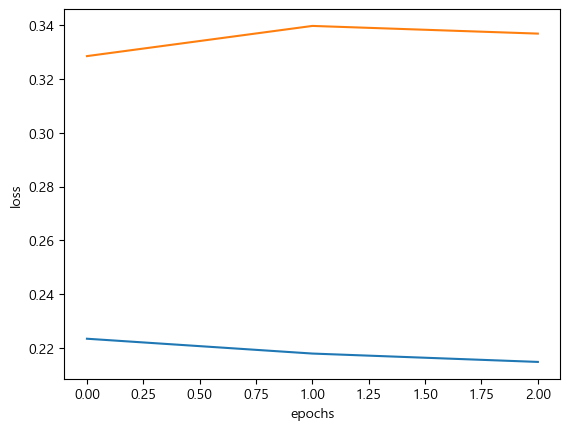

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')

